## Backpropagation

In a neural network, we have multiple chain layers of neurons followed by the loss function. We want to know the impact of a given weight or bias on the loss. To do that, we need to calculate the derivative of the loss function and apply the chain rule with the derivatives of all of the activation functions and neurons in all of the consecutive layers. The derivative WRT the layers inputs, as opposed to the derivative WRT the wieghts and biases, is not used to update any parameters. Instead, it is used to chain to another layer.

During the backwards pass, we calculate the derivative of the loss function, then multiply that by the derivative of the activation function of the output later, then multiply that by the derivative of the output layer, and so on, all the way through all of the hidden layers and activation functions. In the layers, the derivative WRT the weights and biases will form the gradients that is used to update the weights and biases. The derivatives WRT inputs will form the gradient to chain with the previous layer. This layer can calculate the impact of its weights and biases on the loss, and backpropagate gradients on inputs further.

## Single Neuron Example
Lets assume we have a single neuron and we received a gradient of 1 from the next layer.

In [3]:
# forward pass
x = [1.0, -2.0, 3.0]
w = [-3.0, -1.0, 2.0]
b = 1.0

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b

y = max(z, 0)

print(y)

# backward pass
dvalue = 1.0 # the derivative from the next layer

6.0


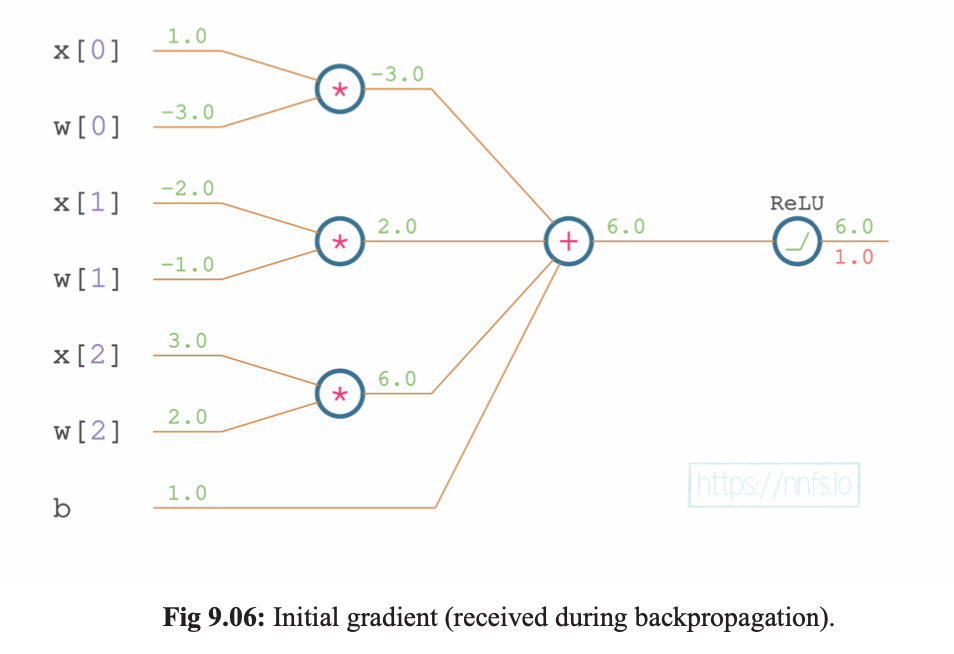

Starting with the derivative of the $ReLU$ function:

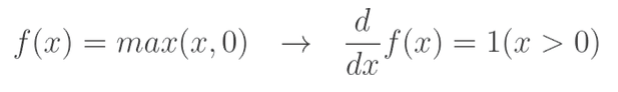

In [4]:
# partial derivative of ReLU
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

1.0


we end up with a derivative used for the sum operation of 1:

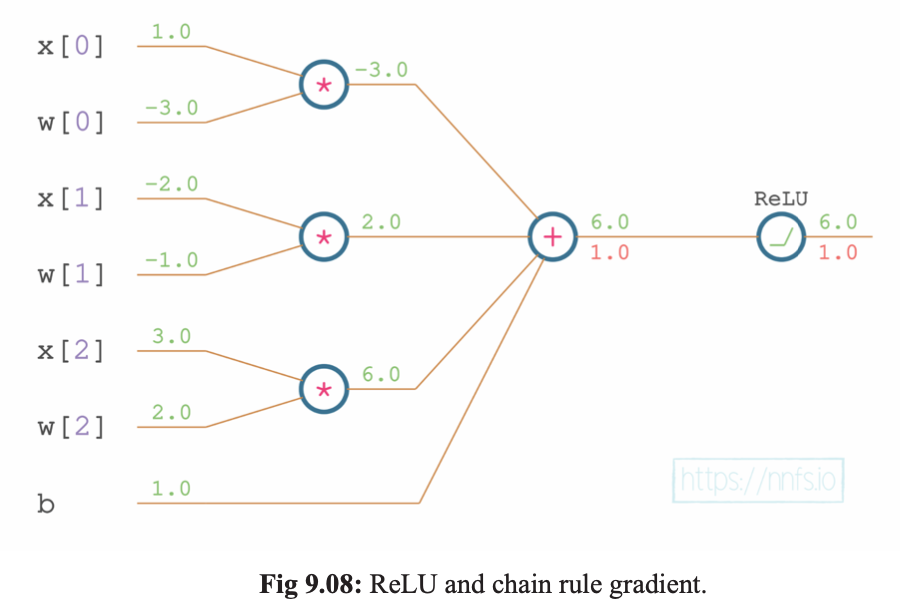

Recall that the partial derivative of the sum operation is always 1:

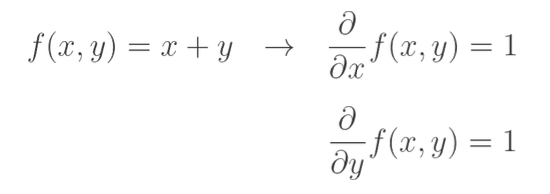

In [5]:
# partial derivatives of the sums
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1

# the chain rule
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db

print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)

1.0 1.0 1.0 1.0


Multiplying the derivative of the sum with 1 results in:

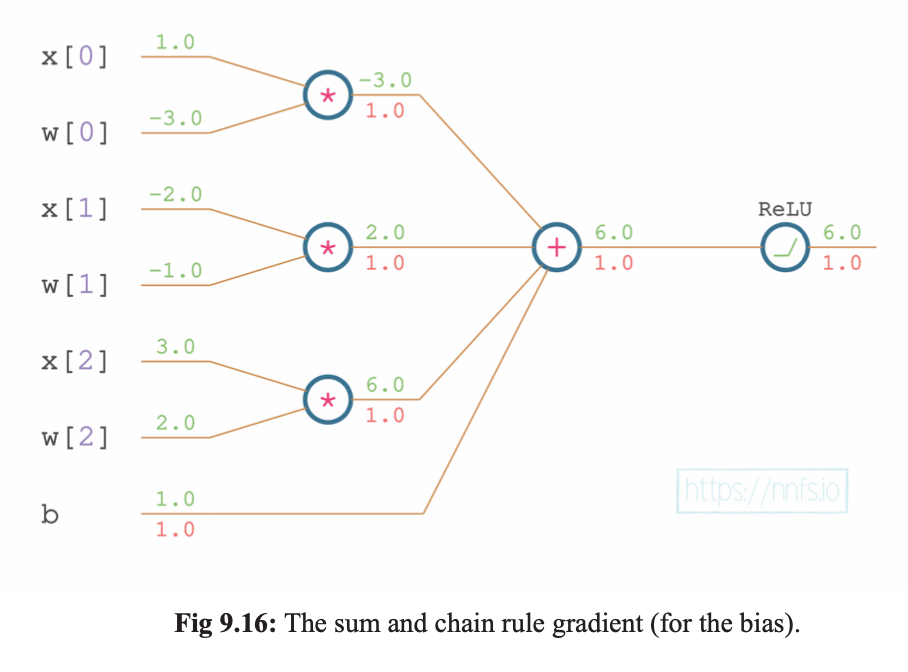

Continuing, we multiply that by the derivative of the muliplication function which is whatever input is being multiplied by:

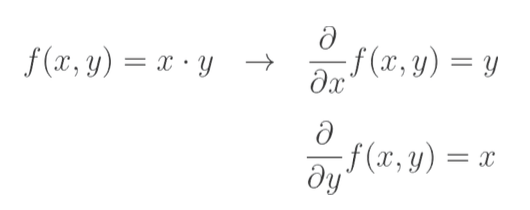

In [6]:
# partial derivative of the multiplication
dmul_dx0 = w[0]
dmul_dx1 = w[1]
dmul_dx2 = w[2]
dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]

# the chain rule
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0

drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1

drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2

print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)

-3.0 1.0 -1.0 -2.0 2.0 3.0


This means that we use the input as the partial derivative for the weights, and the weights for the partial derivative of the input. This results in:

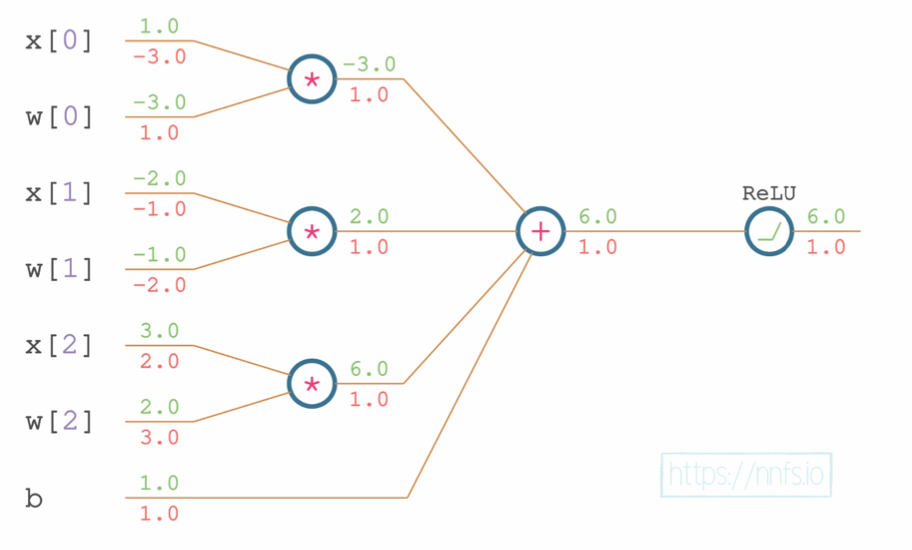

In [7]:
# simplifiying the computation by substituting values
drelu_dz = dvalue * (1. if z > 0 else 0.)

drelu_dx0 = drelu_dz * w[0]
drelu_dw0 = drelu_dz * x[0]

drelu_dx1 = drelu_dz * w[1]
drelu_dw1 = drelu_dz * x[1]

drelu_dx2 = drelu_dz * w[2]
drelu_dw2 = drelu_dz * x[2]

print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)

-3.0 1.0 -1.0 -2.0 2.0 3.0


The partial derivatives from above can be combined into a vector which make up our gradients:

In [8]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2]
dw = [drelu_dw0, drelu_dw1, drelu_dw2]
db = drelu_db

print(dx)
print(dw)
print(db)

[-3.0, -1.0, 2.0]
[1.0, -2.0, 3.0]
1.0


We now want to apply the gradients to the weights to hopefully minimize the output (this is typically the job for the **optimizer**). We apply a negative fraction to the gradient since we want to decrease the final output value, and the gradient shows us the direction of the steepest ascent.

In [9]:
w[0] += -0.001 * dw[0]
w[1] += -0.001 * dw[1]
w[2] += -0.001 * dw[2]
b += -0.001 * db

print(w, b)

[-3.001, -0.998, 1.997] 0.999


Since we have now changes the weights and bias value of the neuron, we can now do another forward pass

In [10]:
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b

y = max(z, 0)
print(y)

5.985


We have decreased the neurons value, but what we really want is to decrease the loss value which is the last one caluclated during the forward pass. This was just an example to show that we can decrease the value using derivatives, partial derivatives, and the chain rule. We now need to expand this to multiple samples and a layer of neurons.

### Multi Sample
Lets now look at a list of 3 samples of inputs, where each sample consists of 4 features. The network will consist of a single hidden layer containing 3 neurons.

During back propogation, each neuron is going to output a gradient of the partial derviatives WRT all of it sinputs, and all the neurons will form a list of these vectors. To calculate the partial derivatives WRT to the inputs we need the weights as the partial derivative WRT to the input equals the related weight. The array of partial derivatives thus equals the array of weights, but since the array of weights is transposed, we need to sum along the rows. To apply the chain rule we need to multiply them by the gradient from the subsequent function

In [11]:
import numpy as np

# passed in gradient from next layer
dvalues = np.array([[1., 1., 1.]])

# 3 sets of weights - one for each neuron
# 4 values per set - one for each input
# weights are transposed
weights = np.array([
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87],
]).T

# dx0 = sum([weights[0][0] * dvalues[0][0], weights[0][1] * dvalues[0][1], weights[0][2] * dvalues[0][2]])
# dx1 = sum([weights[1][0] * dvalues[0][0], weights[1][1] * dvalues[0][1], weights[1][2] * dvalues[0][2]])
# dx2 = sum([weights[2][0] * dvalues[0][0], weights[2][1] * dvalues[0][1], weights[2][2] * dvalues[0][2]])
# dx3 = sum([weights[3][0] * dvalues[0][0], weights[3][1] * dvalues[0][1], weights[3][2] * dvalues[0][2]])

# simplifying
# dx0 = sum(weights[0] * dvalues[0])
# dx1 = sum(weights[1] * dvalues[0])
# dx2 = sum(weights[2] * dvalues[0])
# dx3 = sum(weights[3] * dvalues[0])

# gradient of the neuron function WRT inputs
# dinputs = np.array([dx0, dx1, dx2, dx3])

# using the dot product
dinputs = np.dot(dvalues[0], weights.T)

print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


In [12]:
# passed in gradient from next layer
dvalues = np.array([
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

# sum weights of given input and multiply by the passed in gradient for this neuron
dinputs = np.dot(dvalues, weights.T)
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


Next we need to compute the gradients WRT weights. This is very similar as above, but instead the partial derivative of the weights it the inputs. We need to match the shape of the weights instead of the inputs since we are going to update the weights.

In [13]:
# 3 sets of inputs, 4 values each
inputs = np.array([
    [1, 2, 3, 2.5],
    [2., 5., -1., 2],
    [-1.5, 2.7, 3.3, -0.8],
])

dweights = np.dot(inputs.T, dvalues)

# the output matches the shape of the weights since the weights is transposed
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


Next we need to compute the partial derivatives WRT the biases. Recall that this is always 1, so applying the chain rule means we just need to sum the incoming gradients along each column (axis 0)

In [14]:
# 1 bias for each neuron
biases = np.array([[2, 3, 0.5]])

# dbiases - sum the values of the values along each column
# we want to keep it as a row vector, so keepdims
dbiases = np.sum(dvalues, axis=0, keepdims=True)
print(dbiases)

[[6. 6. 6.]]


Finally, we need to compute the derivative of the ReLU function. Recall, the derivative equals 1 of the input is greater than 0, and 0 otherwise. Then we need to apply the chain rule by multiplying it by the gradients of the next function

In [15]:
# example layer output
z = np.array([
    [1, 2, -3, -4],
    [2, -7, -1, 3],
    [-1, 2, 5, -1],
])

dvalues = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
])

# derivative of ReLU
drelu = np.zeros_like(z)
drelu[z > 0] = 1

print(drelu)

# the chain rule

drelu *= dvalues

print(drelu)

[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


In [16]:
# simplifying

# dertivative of ReLU with the chain rule applied
drelu = dvalues.copy() # copy to ensure we dont modify dvalues during the computation
drelu[z <= 0] = 0 # set value to 0 if z value <= 0

print(drelu)

[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


Putting this all together and minimizing ReLU's output for example purposes only

In [17]:
# weights, inputs, and biases from above

# forward pass
layer_outputs = np.dot(inputs, weights) + biases
relu_outputs = np.maximum(0, layer_outputs)

# backwards pass
drelu = relu_outputs.copy()
drelu[layer_outputs <= 0] = 0

dinputs = np.dot(drelu, weights.T)
dweights = np.dot(inputs.T, drelu)
dbiases = np.sum(drelu, axis=0, keepdims=True)

# update parameters
weights += -0.001 * dweights
biases += -0.001 * dbiases

print(weights)
print(biases)

[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
[[1.98489  2.997739 0.497389]]


## Testing of Backpropgation

In [19]:
from activation import ActivationSoftmaxLossCategoricalCrossentropy, ActivationSoftmax
from loss import CategoricalCrossEntropy

# exmaple output and target values for testing
softmax_outputs = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08],
])
class_targets = np.array([0, 1, 1])

softmax_loss = ActivationSoftmaxLossCategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dvalues = softmax_loss.dinputs
print('Gradients: ActivationSoftmaxLossCategoricalCrossentropy')
print(dvalues)

activation = ActivationSoftmax()
activation.output = softmax_outputs
loss = CategoricalCrossEntropy()
loss.backward(softmax_outputs, class_targets)
activation.backward(loss.dinputs)
dvalues = activation.dinputs
print('Gradients: ActivationSoftmax and CategoricalCrossEntropy')
print(dvalues)

Gradients: ActivationSoftmaxLossCategoricalCrossentropy
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradients: ActivationSoftmax and CategoricalCrossEntropy
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]


### Perfomance Testing

In [29]:
from timeit import timeit

def f1():
    softmax_loss = ActivationSoftmaxLossCategoricalCrossentropy()
    softmax_loss.backward(softmax_outputs, class_targets)
    dvalues = softmax_loss.dinputs
    
def f2():
    activation = ActivationSoftmax()
    activation.output = softmax_outputs
    loss = CategoricalCrossEntropy()
    loss.backward(softmax_outputs, class_targets)
    activation.backward(loss.dinputs)
    dvalues = activation.dinputs
    
t1 = timeit(lambda: f1(), number=10000)
t2 = timeit(lambda: f2(), number=10000)
print(t1)
print(t2)
print(t2/t1)

0.16544688499925542
0.5980129619983927
3.6145314068686396
